## Coursera Assignment: Linear Regression 

In [3]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#creates a table data streucture which is easy to manipulate
df = pd.read_csv("datasets/ex1data1.csv", header = None)
df.head()
df.rename(columns = { 0: 'population', 1: 'profit'}, inplace = True)
df.head() # this print the top 4 rows


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


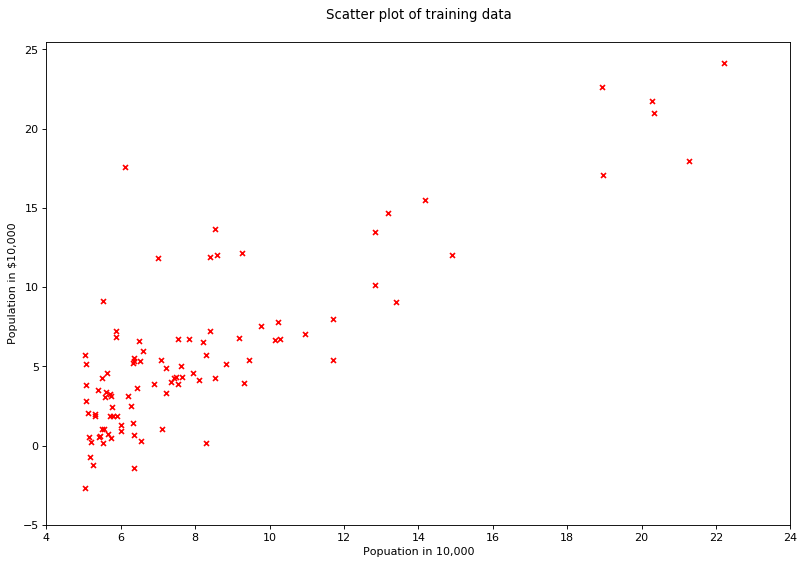

In [50]:
# visualizing the data
fig = plt.figure(num = None, figsize = (12, 8), dpi = 80, facecolor = 'w')
plt.scatter(df['population'], df['profit'], marker = 'x', color = 'red', s = 20)

plt.xlim([4, 24])
plt.xticks(range(4, 26, 2)) # marke range ( start, end, step) -> it'll end before the end
plt.yticks(range(-5, 30, 5))
plt.xlabel("Popuation in 10,000")
plt.ylabel("Population in $10,000")
plt.title("Scatter plot of training data\n")
plt.show()

In [143]:
# perofrming the linear regression
class LinearRegression(object):
    """ Performs LR using batch gradient descnet"""
    
    def __init__(self, X, y, alpha = 0.01, n_iterations = 5000):
        """initialises variables
        
        Parameters : 
        y : numpy array like, output / dependent varaible #population
        X : numpy array like, input / independent variables #profit
        alpha : float, int. Learning rate
        n_iterations : Number of maximum iterations to perform gradient descent
        """
        
        self.y = y;
        
        ''' 
        Till now : X = n x  1 matrix
        But we want in the form thst of we multiplr it with theta(0) matrix it should b in the form of   
                                        theta(not) + theta(1)(x)
        So, for the abouve coefficient to come for each Xi value, we need to include 1 '''

        self.X = self._hstack_one(X) # this process will give us the n x 2 matrix with 1 in 0th column
        
        print(self.X.shape[1]) # X.shape[1] --> number of columns
        self.thetas = np.zeros((self.X.shape[1], 1))  # since X = n x 2, hence thetas = 2 x any for matric multip rule
        
        self.n_rows = self.X.shape[0]
        
        self.alpha = alpha
        self.n_iterations = n_iterations
        
        print("Cost before fitting: {0:.2f}".format(self.cost()))
        
        
    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a col of 1s for the coeff of bias terms

        Parameters : 
        input_matrix : numpuy array like n x m
        returns:
        numpy array with stacked column of 1s in 0th column"""

        c = np.hstack((np.ones((input_matrix.shape[0], 1)) , input_matrix))
        return c
    
    # loss function
    def cost(self, ): 
        """ Calculates the cost of current configuration"""
        
        y_cap = self.X.dot(self.thetas)  # all zeroes
        return (1 / (2 * self.n_rows)) * np.sum((y_cap - self.y) ** 2)
    
    
    def predict(self, new_X):
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)
    
    
    def batch_gradient(self, ):
        y_cap = self.X.dot(self.thetas)
        h = y_cap - self.y
        h = np.multiply(self.X, h) # theta_1  --> see next cell for, more multiplicaion details of this
        h = np.sum(h, axis = 0) # taking the summation
        h = h.reshape(-1, 1) # now we have the two thetas
        return h
        
        
    # doing the gradient descent process
    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            """going by the rul oe batchgradient descent
            calculate all the gradient, then update the thetas
            """
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost() # cacl the loss now
            print("Iteration: {0} Loss: {1: .5f}\r".format(i+1, cost), end="")
        

In [130]:
#  CHECKING THE MATRIX MULTIPLICAGTION RULE
_x = np.ones((5, 2))
_y = np.random.rand(5, 1)
print(_y)
print(np.multiply(_x, _y)) # it will automatically change the shape of the _y and find the resultant into the shape of x

[[0.35438913]
 [0.34801484]
 [0.36853068]
 [0.11208246]
 [0.73665872]]
[[0.35438913 0.35438913]
 [0.34801484 0.34801484]
 [0.36853068 0.36853068]
 [0.11208246 0.11208246]
 [0.73665872 0.73665872]]


In [151]:
X = df['population'].values.reshape(-1, 1) # convert the population array to n x 1 matrix
print(X[0])
y = df['profit'].values.reshape(-1, 1)
lr = LinearRegression(X, y)
lr.batch_gradient_descent()

[6.1101]
2
Cost before fitting: 32.07
[0.87664103]000 Loss:  4.47697


In [158]:
# testing
print(X[0])
print(lr.predict(X)[0])

[4.]
[0.87664103]


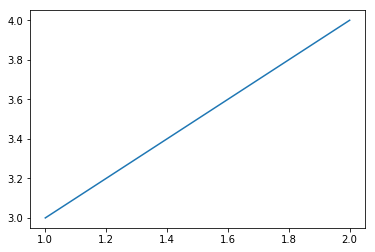

In [148]:
#check how it plots
plt.plot([1, 2], [3, 4])

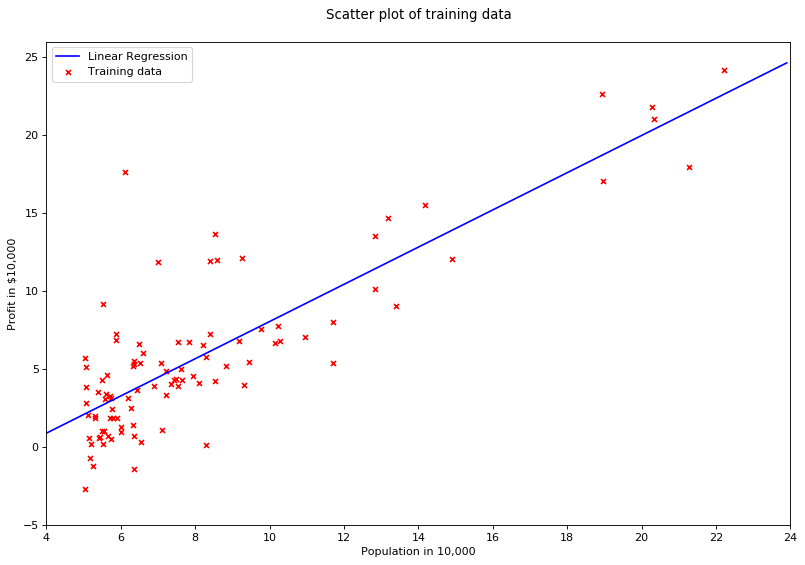

In [159]:
# plot the regression line

fig = plt.figure(num = None, figsize = (12, 8), dpi = 80, facecolor = 'w')
plt.scatter(df['population'], df['profit'], marker = 'x', color = 'red', s = 20, label ='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression') # it's plotting X, Y for every corrwspoding values, on blue line
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()